In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import os
from glob import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 한글폰트 설정

In [2]:
# 안되면 런타임 재시작하고 다시 시작
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
# 체크해보면 폰트 개수가 늘어났다
import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [4]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.13
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [5]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

In [6]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [7]:
sns.set(font=font_name, 
rc={"axes.unicode_minus":False}, style='white')

# 모델링 전 데이터 전처리

이상치 제거 필요

In [8]:
real_df = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/모델링용 최종본/이상_x_스케일_x(총생활인구로나눔).csv')

In [9]:
df = real_df.copy()

In [10]:
df.isnull().sum()

Unnamed: 0    0
행정동           0
인허가일자         0
상권코드          0
사업장명          0
시군구코드         0
행정동코드         0
소재지수정         0
폐업여부          0
사업기간          0
현재영업여부        0
인허가분기         0
인허가년도         0
다중이용업소여부      0
철도역_유무        0
버스터미널_유무      0
가맹여부          0
코로나여부         0
상권여부          0
대학교_유무        0
백화점_유무        0
폐업1년이내        0
폐업3년이내        0
시설총규모         0
추정임대료         0
집객시설_수        0
관공서_수         0
은행_수          0
슈퍼마켓_수        0
극장_수          0
숙박_시설_수       0
지하철_역_수       0
버스_정거장_수      0
총_생활인구_수      0
아파트_단지_수      0
의료기관_수        0
교육기관_수        0
생활인구_성별_비     0
아파트_평당_가격     0
총 상주인구 수      0
상주인구_성별_비     0
총 가구 수        0
거주_유형_비       0
점포당_매출_금액     0
건수당_매출_금액     0
점포수           0
유사_업종_점포_수    0
프랜차이즈_점포_수    0
개업_율          0
폐업_률          0
선행종합지수        0
소비자물가지수       0
소비자심리지수       0
중소기업대출금리      0
업종분류          0
상권변화_지표명      0
상권구분_코드명      0
시군구           0
생활인구_연령_대표    0
상주인구_연령_대표    0
dtype: int64

In [11]:
df = df.drop(columns=['Unnamed: 0'])
# main = main.drop(columns=['청년층_생활인구','중년층_생활인구','노년층_생활인구'])

In [12]:
df.columns

Index(['행정동', '인허가일자', '상권코드', '사업장명', '시군구코드', '행정동코드', '소재지수정', '폐업여부',
       '사업기간', '현재영업여부', '인허가분기', '인허가년도', '다중이용업소여부', '철도역_유무', '버스터미널_유무',
       '가맹여부', '코로나여부', '상권여부', '대학교_유무', '백화점_유무', '폐업1년이내', '폐업3년이내',
       '시설총규모', '추정임대료', '집객시설_수', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수',
       '숙박_시설_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수', '의료기관_수',
       '교육기관_수', '생활인구_성별_비', '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '총 가구 수',
       '거주_유형_비', '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수',
       '개업_율', '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리', '업종분류',
       '상권변화_지표명', '상권구분_코드명', '시군구', '생활인구_연령_대표', '상주인구_연령_대표'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45702 entries, 0 to 45701
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정동         45702 non-null  object 
 1   인허가일자       45702 non-null  object 
 2   상권코드        45702 non-null  float64
 3   사업장명        45702 non-null  object 
 4   시군구코드       45702 non-null  float64
 5   행정동코드       45702 non-null  float64
 6   소재지수정       45702 non-null  object 
 7   폐업여부        45702 non-null  int64  
 8   사업기간        45702 non-null  float64
 9   현재영업여부      45702 non-null  int64  
 10  인허가분기       45702 non-null  int64  
 11  인허가년도       45702 non-null  int64  
 12  다중이용업소여부    45702 non-null  int64  
 13  철도역_유무      45702 non-null  int64  
 14  버스터미널_유무    45702 non-null  int64  
 15  가맹여부        45702 non-null  int64  
 16  코로나여부       45702 non-null  int64  
 17  상권여부        45702 non-null  int64  
 18  대학교_유무      45702 non-null  int64  
 19  백화점_유무      45702 non-nul

In [14]:
df.describe()

,상권코드,시군구코드,행정동코드,폐업여부,사업기간,현재영업여부,인허가분기,인허가년도,다중이용업소여부,철도역_유무,...,건수당_매출_금액,점포수,유사_업종_점포_수,프랜차이즈_점포_수,개업_율,폐업_률,선행종합지수,소비자물가지수,소비자심리지수,중소기업대출금리
count,4.570200e+04,45702.000000,4.570200e+04,45702.000000,45702.000000,45702.000000,45702.000000,45702.000000,45702.000000,45702.000000,...,4.570200e+04,45702.000000,45702.000000,4.570200e+04,45702.000000,45702.000000,45702.000000,45702.000000,45702.000000,45702.000000
mean,2.104256e+06,11463.717671,1.146434e+07,0.304013,856.723885,0.695987,2.513457,2019.058991,0.084066,0.007199,...,2.941903e+04,0.000060,0.000049,1.754492e-05,1.294046,1.237110,116.195398,99.756377,99.156339,3.822434
std,1.092558e+05,190.047501,1.900333e+05,0.459993,516.644086,0.459993,1.100050,1.388331,0.277490,0.084541,...,2.592131e+04,0.007286,0.005909,2.128255e-03,1.009967,1.001049,6.103403,1.621880,9.311555,0.656589
min,1.001491e+06,11110.000000,1.111052e+07,0.000000,0.000000,0.000000,1.000000,2017.000000,0.000000,0.000000,...,2.502627e+03,0.000000,0.000000,0.000000e+00,0.000000,0.000000,107.200000,97.338000,73.000000,3.250000
25%,2.110478e+06,11290.000000,1.129081e+07,0.000000,423.000000,0.000000,2.000000,2018.000000,0.000000,0.000000,...,1.862816e+04,0.000002,0.000001,2.491019e-07,0.000000,0.000000,112.100000,98.855000,94.000000,3.250000
50%,2.110905e+06,11470.000000,1.147058e+07,0.000000,764.000000,1.000000,2.000000,2019.000000,0.000000,0.000000,...,2.678993e+04,0.000003,0.000002,6.868614e-07,1.475907,1.386294,114.000000,99.462000,100.000000,3.440000
75%,2.120131e+06,11650.000000,1.165053e+07,1.000000,1235.000000,1.000000,3.000000,2020.000000,0.000000,0.000000,...,3.485609e+04,0.000005,0.000004,1.391960e-06,2.028148,1.945910,120.300000,100.330000,106.000000,4.600000
max,2.130326e+06,11740.000000,1.174070e+07,1.000000,2005.000000,1.000000,4.000000,2021.000000,1.000000,1.000000,...,2.143374e+06,1.253733,1.014841,3.662041e-01,4.615121,5.707110,127.700000,104.040000,113.000000,4.710000


In [15]:
# 영업중인 상권기준으로 사업기간이 3년 이하인 업체 제거
df =df[~((df['현재영업여부']==1)*(df['사업기간']<365))]

In [16]:
df['폐업1년이내'].value_counts()/len(df)

0    0.877355
1    0.122645
Name: 폐업1년이내, dtype: float64

In [17]:
df.columns

Index(['행정동', '인허가일자', '상권코드', '사업장명', '시군구코드', '행정동코드', '소재지수정', '폐업여부',
       '사업기간', '현재영업여부', '인허가분기', '인허가년도', '다중이용업소여부', '철도역_유무', '버스터미널_유무',
       '가맹여부', '코로나여부', '상권여부', '대학교_유무', '백화점_유무', '폐업1년이내', '폐업3년이내',
       '시설총규모', '추정임대료', '집객시설_수', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수',
       '숙박_시설_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수', '의료기관_수',
       '교육기관_수', '생활인구_성별_비', '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '총 가구 수',
       '거주_유형_비', '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수',
       '개업_율', '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리', '업종분류',
       '상권변화_지표명', '상권구분_코드명', '시군구', '생활인구_연령_대표', '상주인구_연령_대표'],
      dtype='object')

In [18]:
df = df.drop(columns = ['사업장명', '시군구코드', '행정동코드', '소재지수정','폐업여부','현재영업여부','인허가일자','사업기간','폐업3년이내']) # 필요없는 변수 제거

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41714 entries, 0 to 45685
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정동         41714 non-null  object 
 1   상권코드        41714 non-null  float64
 2   인허가분기       41714 non-null  int64  
 3   인허가년도       41714 non-null  int64  
 4   다중이용업소여부    41714 non-null  int64  
 5   철도역_유무      41714 non-null  int64  
 6   버스터미널_유무    41714 non-null  int64  
 7   가맹여부        41714 non-null  int64  
 8   코로나여부       41714 non-null  int64  
 9   상권여부        41714 non-null  int64  
 10  대학교_유무      41714 non-null  int64  
 11  백화점_유무      41714 non-null  int64  
 12  폐업1년이내      41714 non-null  int64  
 13  시설총규모       41714 non-null  float64
 14  추정임대료       41714 non-null  float64
 15  집객시설_수      41714 non-null  float64
 16  관공서_수       41714 non-null  float64
 17  은행_수        41714 non-null  float64
 18  슈퍼마켓_수      41714 non-null  float64
 19  극장_수        41714 non-nul

In [20]:
df['인허가년도'] = df['인허가년도'].astype('str')
df['인허가분기']= df['인허가분기'].astype('str')

In [21]:
len(df['행정동'].unique())
len(df['시군구'].unique())
len(df['업종분류'].unique())

10

In [ ]:
# 행정동 = df.pop('행정동') # 결정트리 구조에선 안빼고 해보자

In [ ]:
# 여기서 mi score를 구해야할 필요가 있다.
# vif를 통해 너무 겹치는거 제거.

# mi score,**vif** 계산


In [ ]:
# 더미변수 로 변환하지 않은 train, test 샘플로 분리
from sklearn.model_selection import train_test_split
data = df[df.columns.difference(["폐업3년이내"])]
label = df['폐업3년이내']
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size = 0.3, shuffle = True, random_state = 21)

KeyError: ignored

In [ ]:
category_feature = [ col for col in X_train.columns if X_train[col].dtypes == "object"]
num_feature = X_train.columns.difference(category_feature)

In [ ]:
for col in num_feature:
  X_train[col] = X_train[col].astype(int)

In [ ]:
for colname in X_train.select_dtypes("object"):
    X_train[colname], _ = X_train[colname].factorize()

discrete_features = X_train.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="3년이내 폐업으로 한 MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train, discrete_features)
mi_scores  # show a few features with their MI scores

추정임대료         1.801192
점포당_매출_금액     1.154851
총_생활인구_수      1.010384
건수당_매출_금액     0.996965
아파트_평당_가격     0.744570
총 상주인구 수      0.673257
총 가구 수        0.566033
선행종합지수        0.147625
소비자심리지수       0.133408
인허가년도         0.112610
코로나여부         0.100758
소비자물가지수       0.066255
중소기업대출금리      0.051879
아파트_단지_수      0.043475
시설총규모         0.033462
집객시설_수        0.017904
의료기관_수        0.015501
버스_정거장_수      0.013496
지하철_역_수       0.012418
극장_수          0.011152
상권변화_지표명      0.010719
업종분류          0.010174
슈퍼마켓_수        0.008629
숙박_시설_수       0.007785
인허가분기         0.007251
상주인구_연령_대표    0.006963
다중이용업소여부      0.006359
은행_수          0.006149
생활인구_연령_대표    0.005949
상주인구_성별_비     0.005930
가맹여부          0.005406
교육기관_수        0.005350
폐업_률          0.004906
상권여부          0.003530
개업_율          0.003498
시군구           0.003109
대학교_유무        0.002988
거주_유형_비       0.002082
버스_터미널_수      0.001917
관공서_수         0.001898
상권구분_코드명      0.001773
철도_역_수        0.001541
유사_업종_점포_수    0.000000
생활인구_성별_비  

In [ ]:
mi_index = mi_scores[mi_scores > 0.01].index

In [ ]:
X_train.loc[:,mi_index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18808 entries, 17328 to 20650
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   추정임대료      18808 non-null  int64
 1   점포당_매출_금액  18808 non-null  int64
 2   총_생활인구_수   18808 non-null  int64
 3   건수당_매출_금액  18808 non-null  int64
 4   아파트_평당_가격  18808 non-null  int64
 5   총 상주인구 수   18808 non-null  int64
 6   총 가구 수     18808 non-null  int64
 7   선행종합지수     18808 non-null  int64
 8   소비자심리지수    18808 non-null  int64
 9   인허가년도      18808 non-null  int64
 10  코로나여부      18808 non-null  int64
 11  소비자물가지수    18808 non-null  int64
 12  중소기업대출금리   18808 non-null  int64
 13  아파트_단지_수   18808 non-null  int64
 14  시설총규모      18808 non-null  int64
 15  집객시설_수     18808 non-null  int64
 16  의료기관_수     18808 non-null  int64
 17  버스_정거장_수   18808 non-null  int64
 18  지하철_역_수    18808 non-null  int64
 19  극장_수       18808 non-null  int64
 20  상권변화_지표명   18808 non-null  int64
 21  업종분류    

# **모델링 작업**

In [22]:
# 이건 모든 변수 사용
from sklearn.model_selection import train_test_split
data = df[df.columns.difference(["폐업1년이내"])]
label = df['폐업1년이내']
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size = 0.3, shuffle = True, random_state = 21)

In [23]:
# 전처리를 위해 train데이터와 test데이터 병합
whole_df = X_train.append(X_test)
# train 로우 개수 미리 확인(다시 나눠야 하니깐)
train_df_num = len(X_train)

In [24]:
# whole_df = pd.get_dummies(whole_df)
# whole_index = whole_df.columns

In [25]:
category_feature = [ col for col in X_train.columns if X_train[col].dtypes == "object"]

In [26]:
category_feature

['상권구분_코드명',
 '상권변화_지표명',
 '상주인구_연령_대표',
 '생활인구_연령_대표',
 '시군구',
 '업종분류',
 '인허가년도',
 '인허가분기',
 '행정동']

In [27]:
whole_df

,가맹여부,개업_율,거주_유형_비,건수당_매출_금액,관공서_수,교육기관_수,극장_수,다중이용업소여부,대학교_유무,백화점_유무,...,집객시설_수,철도역_유무,총 가구 수,총 상주인구 수,총_생활인구_수,추정임대료,코로나여부,폐업_률,프랜차이즈_점포_수,행정동
15722,0,1.791759,0.000000,27630.130935,1.875726e-07,1.250484e-07,0.0,0,0,0,...,0.000006,0,6431.0,12992.0,15993805.0,132249600.0,0,1.945910,1.300154e-07,충정로3가
19127,0,1.504077,0.000000,33096.703036,3.600606e-06,0.000000e+00,0.0,1,0,0,...,0.000029,0,1713.0,2589.0,555462.0,282948000.0,1,0.916291,2.775180e-07,한남동
31271,0,2.624669,0.042056,19711.831506,0.000000e+00,0.000000e+00,0.0,0,0,0,...,0.000012,0,892.0,1362.0,424847.0,340581800.0,0,2.028148,5.848945e-06,문정동
20516,1,1.609438,0.000000,20784.143607,0.000000e+00,0.000000e+00,0.0,0,0,0,...,0.000014,0,1541.0,3476.0,1076070.0,134856410.0,1,2.197225,6.441469e-07,상계동
11328,0,2.484907,0.034141,27079.391314,1.430587e-06,1.430587e-06,0.0,0,0,0,...,0.000043,0,939.0,2033.0,699014.0,90895200.0,0,0.000000,1.571660e-06,화곡동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37501,1,2.397895,0.012060,24307.680820,0.000000e+00,0.000000e+00,0.0,0,0,0,...,0.000078,0,3105.0,3811.0,436220.0,700960000.0,0,1.791759,8.874423e-06,문정동
39380,0,2.533697,0.000000,10652.597696,7.590311e-07,0.000000e+00,0.0,0,0,0,...,0.000003,0,2676.0,5206.0,2634938.0,216182120.0,1,2.104134,3.322540e-07,천호동
862,0,1.386294,0.158845,35344.509112,0.000000e+00,5.822599e-07,0.0,0,0,0,...,0.000033,0,1284.0,2275.0,1717446.0,87048000.0,0,1.386294,9.371112e-07,화곡동
23019,0,0.000000,0.000000,17588.984807,1.925224e-06,0.000000e+00,0.0,0,1,0,...,0.000054,0,630.0,830.0,519420.0,360450000.0,1,2.197225,3.098529e-06,동숭동


In [28]:
from sklearn.preprocessing import LabelEncoder

for col in category_feature:
  le = LabelEncoder()
  le.fit(whole_df[col])
  whole_df[col]=le.transform(whole_df[col])

In [29]:
# 다시 데이터 트레인과 test로 분리
X_train = whole_df[:train_df_num]
X_test = whole_df[train_df_num:]

# 불균형 데이터 처리

In [30]:
# 필요 함수 정의
from collections import Counter
from matplotlib import pyplot


def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()
    

Class=0, n=25632 (48.983%)
Class=1, n=26696 (51.017%)


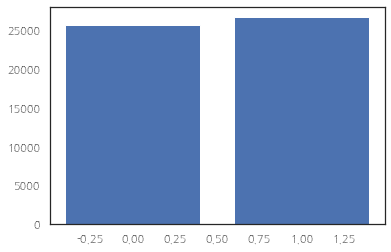

In [31]:
from imblearn.over_sampling import ADASYN

X_train,y_train = ADASYN(random_state=21).fit_resample(X_train,y_train)
count_and_plot(y_train)

In [32]:
X_train.shape

(52328, 49)

Class=1, n=10581 (49.107%)
Class=0, n=10966 (50.893%)


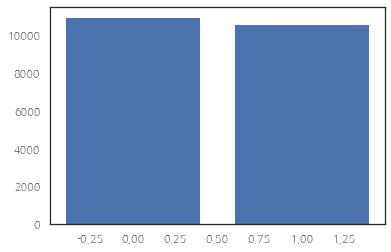

In [33]:
from imblearn.over_sampling import ADASYN

X_test,y_test = ADASYN(random_state=21).fit_resample(X_test,y_test)
count_and_plot(y_test)

In [34]:
# 전처리를 위해 train데이터와 test데이터 병합
whole_df = X_train.append(X_test)
# train 로우 개수 미리 확인(다시 나눠야 하니깐)
train_df_num = len(X_train)

# 여기서부터 다시 모델링

In [ ]:
skew = pd.DataFrame(X_train.skew())

In [ ]:
skewid = skew.loc[skew[0]>3].index
skew.loc[skew[0]>3]

,0
거주_유형_비,14.838561
건수당_매출_금액,24.429578
관공서_수,7.196714
교육기관_수,5.442163
극장_수,10.548661
다중이용업소여부,4.041832
대학교_유무,5.519873
백화점_유무,5.932679
버스_정거장_수,40.642351
버스터미널_유무,15.844171


In [ ]:
skewid

Index(['거주_유형_비', '건수당_매출_금액', '관공서_수', '교육기관_수', '극장_수', '다중이용업소여부', '대학교_유무',
       '백화점_유무', '버스_정거장_수', '버스터미널_유무', '상주인구_성별_비', '숙박_시설_수', '슈퍼마켓_수',
       '시설총규모', '아파트_단지_수', '유사_업종_점포_수', '은행_수', '의료기관_수', '점포수', '지하철_역_수',
       '집객시설_수', '철도역_유무', '추정임대료', '프랜차이즈_점포_수'],
      dtype='object')

In [ ]:
# 로그변환 작업
for col in skewid:
  whole_df[col] = np.log1p(whole_df[col])

In [35]:
# 다시 데이터 트레인과 test로 분리
X_train = whole_df[:train_df_num]
X_test = whole_df[train_df_num:]

In [36]:
skew = pd.DataFrame(X_train.skew()) # 조금 줄긴함 하지만 여전히 skew
skew.loc[skew[0]>3]

,0
거주_유형_비,14.838561
건수당_매출_금액,24.429578
관공서_수,7.196714
교육기관_수,5.442163
극장_수,10.548661
다중이용업소여부,4.041832
대학교_유무,5.519873
백화점_유무,5.932679
버스_정거장_수,40.642351
버스터미널_유무,15.844171


# 결정트리 모델링

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=40,min_samples_leaf=1)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=40)

In [38]:
y_pred = tree_clf.predict(X_test)

In [39]:
y_test

0        1
1        0
2        0
3        0
4        1
        ..
21542    1
21543    1
21544    1
21545    1
21546    1
Name: 폐업1년이내, Length: 21547, dtype: int64

In [40]:
tree_clf.get_params() # 결정해야할 파라미터 확인

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [41]:
import sklearn
sklearn.metrics.SCORERS

{'accuracy': make_scorer(accuracy_score),
 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score),
 'adjusted_rand_score': make_scorer(adjusted_rand_score),
 'average_precision': make_scorer(average_precision_score, needs_threshold=True),
 'balanced_accuracy': make_scorer(balanced_accuracy_score),
 'completeness_score': make_scorer(completeness_score),
 'explained_variance': make_scorer(explained_variance_score),
 'f1': make_scorer(f1_score, average=binary),
 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro),
 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro),
 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples),
 'f1_weighted': make_scorer(f1_score, pos_label=None, average=weighted),
 'fowlkes_mallows_score': make_scorer(fowlkes_mallows_score),
 'homogeneity_score': make_scorer(homogeneity_score),
 'jaccard': make_scorer(jaccard_score, average=binary),
 'jaccard_macro': make_scorer(jaccard_score, pos_label=None, average=mac

In [42]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[40],'min_samples_leaf':[1]}

grid_reg = GridSearchCV(tree_clf, param_grid=params, scoring='f1', cv=3)
grid_reg.fit(X_train, y_train)
print('최적 하이퍼 파라미터 :{0}, 최적 평균 f1_score :{1:.3f}'.format(grid_reg.best_params_,
                                                   grid_reg.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 40, 'min_samples_leaf': 1}, 최적 평균 f1_score :0.845


In [43]:
y_pred = grid_reg.predict(X_test)

In [44]:
# 성능 평가

from sklearn.metrics import accuracy_score, roc_auc_score,f1_score,confusion_matrix

def get_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test,y_pred)
    roc_score =  roc_auc_score(y_test, y_pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{:.2f}, f1 score:{:.2f}, roc_score:{:.2f}'.format(accuracy,f1,roc_score))

get_eval(y_test,y_pred)

Confusion Matrix
[[9418 1548]
 [1987 8594]]
정확도:0.84, f1 score:0.83, roc_score:0.84


In [45]:
df['총_생활인구_수'] # 이걸로 아파트 수 이런걸 나눠준다면..

0        1789210.0
1         573197.0
2        1048093.0
3        1674103.0
4        2974497.0
           ...    
45614    1710881.0
45637    4717980.0
45661    2124393.0
45681    1552127.0
45685    2982660.0
Name: 총_생활인구_수, Length: 41714, dtype: float64

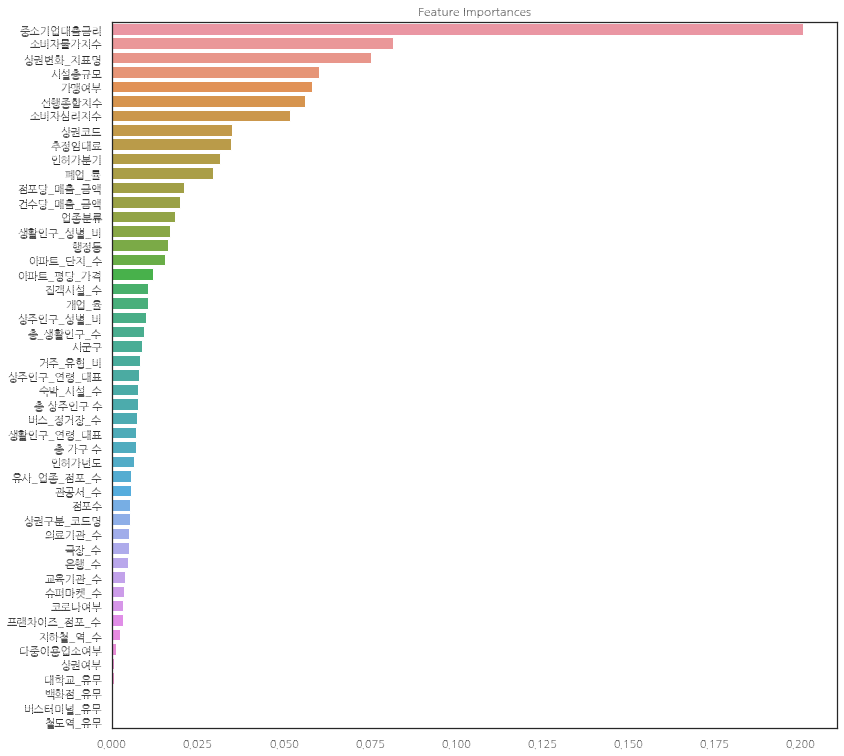

In [46]:
import seaborn as sns
feature_importance_values = tree_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=whole_df.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False) # 10개 혹은 20개 등 개수를 바꾸고 싶다면 이 부분을 변경
 
fig = plt.figure(figsize=[8, 6])
plt.title('Feature Importances')
plt.rcParams['figure.figsize'] = [13, 13]
sns.barplot(x=feature_top5, y=feature_top5.index)
fig.set_size_inches(13, 13)
plt.show()


In [47]:
중요도 = pd.DataFrame(tree_clf.feature_importances_).T
중요도.columns = whole_df.columns
중요도 = 중요도.T.rename(columns={0:"중요도"})
중요도 = 중요도.sort_values("중요도",ascending=False)
중요도

,중요도
중소기업대출금리,0.200672
소비자물가지수,0.081645
상권변화_지표명,0.075390
시설총규모,0.060342
가맹여부,0.058070
선행종합지수,0.056173
소비자심리지수,0.051897
상권코드,0.034947
추정임대료,0.034640
인허가분기,0.031542


In [48]:
importantCol = 중요도.loc[중요도['중요도']>0.01].index
importantCol

Index(['중소기업대출금리', '소비자물가지수', '상권변화_지표명', '시설총규모', '가맹여부', '선행종합지수', '소비자심리지수',
       '상권코드', '추정임대료', '인허가분기', '폐업_률', '점포당_매출_금액', '건수당_매출_금액', '업종분류',
       '생활인구_성별_비', '행정동', '아파트_단지_수', '아파트_평당_가격', '집객시설_수', '개업_율'],
      dtype='object')

In [49]:
# 해당칼럼만 사용
X_trainImp= X_train.loc[:,importantCol]
X_testImp = X_test.loc[:,importantCol]

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_trainImp,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = tree_clf.predict(X_testImp)

In [52]:
y_pred.shape

(21547,)

In [53]:
y_test.shape

(21547,)

In [54]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[30,35,40,50],'min_samples_leaf':[1]}

grid_reg = GridSearchCV(tree_clf, param_grid=params, scoring='f1', cv=3)
grid_reg.fit(X_train, y_train)
print('최적 하이퍼 파라미터 :{0}, 최적 평균 f1_score :{1:.3f}'.format(grid_reg.best_params_,
                                                   grid_reg.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 50, 'min_samples_leaf': 1}, 최적 평균 f1_score :0.845


In [55]:
y_pred = grid_reg.predict(X_test)

In [56]:
# 성능 평가

from sklearn.metrics import accuracy_score, roc_auc_score,f1_score,confusion_matrix

def get_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test,y_pred)
    roc_score =  roc_auc_score(y_test, y_pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{:.2f}, f1 score:{:.2f}, roc_score:{:.2f}'.format(accuracy,f1,roc_score))

get_eval(y_test,y_pred)

Confusion Matrix
[[9408 1558]
 [2007 8574]]
정확도:0.83, f1 score:0.83, roc_score:0.83


# 랜덤포레스트 기법

In [57]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=40,random_state=0,n_jobs=-1)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=0)

In [58]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [10, 100]}


# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1,max_depth=40)
# grid_cv = GridSearchCV(rf_clf, param_grid = params,scoring='f1',cv = 3, n_jobs = -1)
# grid_cv.fit(X_train, y_train)

# print('최적 하이퍼 파라미터 :{0}, 최적 평균 f1_score :{1:.3f}'.format(grid_reg.best_params_,
#                                                    grid_reg.best_score_))

In [59]:
y_pred = rnd_clf.predict(X_test)

In [60]:
# 성능 평가

from sklearn.metrics import accuracy_score, roc_auc_score,f1_score,confusion_matrix

def get_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test,y_pred)
    roc_score =  roc_auc_score(y_test, y_pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{:.2f}, f1 score:{:.2f}, roc_score:{:.2f}'.format(accuracy,f1,roc_score))

get_eval(y_test,y_pred)

Confusion Matrix
[[10716   250]
 [ 1841  8740]]
정확도:0.90, f1 score:0.89, roc_score:0.90


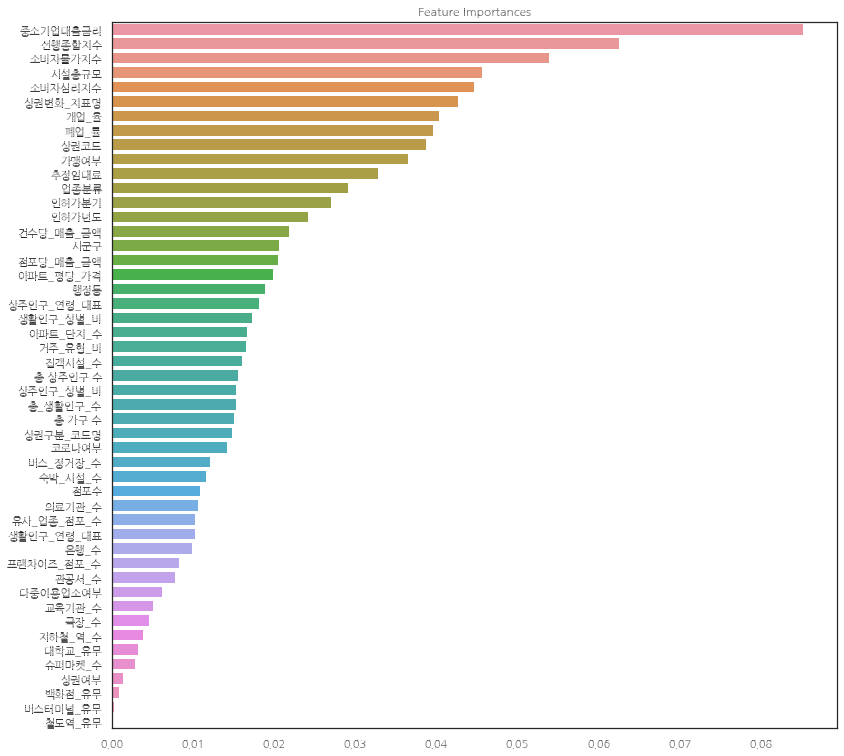

In [61]:
import seaborn as sns
feature_importance_values = rnd_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=whole_df.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False) # 10개 혹은 20개 등 개수를 바꾸고 싶다면 이 부분을 변경
 
fig = plt.figure(figsize=[8, 6])
plt.title('Feature Importances')
plt.rcParams['figure.figsize'] = [13, 13]
sns.barplot(x=feature_top5, y=feature_top5.index)
fig.set_size_inches(13, 13)
plt.show()

In [62]:
중요도 = pd.DataFrame(rnd_clf.feature_importances_).T
중요도.columns = whole_df.columns
중요도 = 중요도.T.rename(columns={0:"중요도"})
중요도 = 중요도.sort_values("중요도",ascending=False)
중요도

,중요도
중소기업대출금리,0.085126
선행종합지수,0.062499
소비자물가지수,0.053943
시설총규모,0.045577
소비자심리지수,0.044702
상권변화_지표명,0.042648
개업_율,0.040269
폐업_률,0.039575
상권코드,0.038674
가맹여부,0.036453


In [63]:
importantCol = 중요도.loc[중요도['중요도']>0.01].index
importantCol

Index(['중소기업대출금리', '선행종합지수', '소비자물가지수', '시설총규모', '소비자심리지수', '상권변화_지표명', '개업_율',
       '폐업_률', '상권코드', '가맹여부', '추정임대료', '업종분류', '인허가분기', '인허가년도', '건수당_매출_금액',
       '시군구', '점포당_매출_금액', '아파트_평당_가격', '행정동', '상주인구_연령_대표', '생활인구_성별_비',
       '아파트_단지_수', '거주_유형_비', '집객시설_수', '총 상주인구 수', '상주인구_성별_비', '총_생활인구_수',
       '총 가구 수', '상권구분_코드명', '코로나여부', '버스_정거장_수', '숙박_시설_수', '점포수', '의료기관_수',
       '유사_업종_점포_수', '생활인구_연령_대표'],
      dtype='object')

In [64]:
# 해당칼럼만 사용
X_trainImp= X_train.loc[:,importantCol]
X_testImp = X_test.loc[:,importantCol]

In [65]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=40,random_state=0,n_jobs=-1)
rnd_clf.fit(X_trainImp,y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=0)

In [66]:
y_pred = rnd_clf.predict(X_testImp)

In [67]:
# 성능 평가

from sklearn.metrics import accuracy_score, roc_auc_score,f1_score,confusion_matrix

def get_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test,y_pred)
    roc_score =  roc_auc_score(y_test, y_pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{:.2f}, f1 score:{:.2f}, roc_score:{:.2f}'.format(accuracy,f1,roc_score))

get_eval(y_test,y_pred)

Confusion Matrix
[[10720   246]
 [ 1848  8733]]
정확도:0.90, f1 score:0.89, roc_score:0.90


In [68]:
# kfold 한번 해줘야함